In [1]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [102]:
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")

In [103]:
X_train.shape

(8000, 10)

In [104]:
y_train.shape

(8000,)

In [105]:
X_test.shape

(16000, 10)

In [106]:
# --- Paste the modified quantile_plot function from above here ---
def quantile_plot(x, y, ax, by=None, bins=10, by_bins=3, y_fn=np.mean):
    assert len(x) == len(y)
    def qp_data(x, y):
        fac = np.searchsorted(np.quantile(x, q=[i / bins for i in range(1, bins)]), x)
        ufac = np.unique(fac)
        qx = np.array([np.mean(x[fac == f]) for f in ufac])
        qy = np.array([y_fn(y[fac == f]) for f in ufac])
        return qx, qy
    qx, qy = qp_data(x, y)
    if by is None:
        ax.plot(qx, qy, "-o")
    else:
        assert len(x) == len(by)
        ax.plot(qx, qy, "-o", label="ALL", color="lightgrey")
        by_fac = np.searchsorted(np.quantile(by, q=[i / by_bins for i in range(1, by_bins)]), by)
        by_ufac = np.unique(by_fac)
        for i, f in enumerate(np.unique(by_ufac)):
            mask = by_fac == f
            nm = f"{i}) {min(by[mask]):.2f} / {max(by[mask]):.2f}"
            qx, qy = qp_data(x[mask], y[mask])
            ax.plot(qx, qy, "-o", label=nm)
        ax.legend()
# --- End of function definition ---

## Converting numpy array to pandas dataframe

In [230]:
var_count = X_train.shape[1]
train_count = X_train.shape[0]
test_count = X_test.shape[0]
var_list = ["v_"+str(i) for i in range(1, var_count+1)]

In [231]:
X_train_df = pd.DataFrame(X_train, columns=var_list)
X_test_df = pd.DataFrame(X_test, columns=var_list)
y_train_df = pd.DataFrame(y_train, columns=['y'])

In [109]:
X_train_df.head(2)

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
0,-1.030086,0.744488,0.937688,-1.909721,0.441239,-1.749620,0.077734,1.137308,0.370874,0.155145
1,0.151172,0.386191,-0.422696,1.739644,0.588353,-0.008641,0.670548,0.985404,0.032382,-1.376448


In [110]:
X_test_df.head(2)

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
0,-0.178913,-1.270879,0.445100,1.547729,0.546413,2.377554,-1.125253,-0.017077,1.419819,-0.629672
1,-2.479271,-0.870515,0.205303,-0.995020,2.805032,2.656087,0.779858,1.628302,1.201014,0.155298


In [111]:
y_train_df.head(2)

,y
0,16.566999
1,13.711711


## EDA
1. Getting null count
2. Getting distributions of each feature
3. Getting spread of each feature w.r.t y

In [112]:
X_train_df.describe()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.005068,0.003536,0.002277,-0.018162,0.791757,0.028068,-0.003231,0.800376,-0.000086,0.009396
std,1.005833,0.999082,0.577940,1.160943,0.601678,1.446540,0.989907,1.177576,1.008131,1.011339
min,-3.721005,-3.648331,-0.999782,-1.999753,0.000117,-8.682783,-3.603690,-3.221563,-4.507306,-3.693629
25%,-0.676857,-0.673515,-0.497092,-1.032125,0.311250,-0.661313,-0.681760,0.001374,-0.677126,-0.673832
50%,-0.008288,-0.009898,0.000410,-0.029931,0.667525,0.023345,0.010970,0.750908,0.010491,0.022640
75%,0.697822,0.665128,0.509849,0.978363,1.141792,0.699970,0.673435,1.571433,0.664620,0.705872
max,3.337348,3.971553,0.999837,1.999695,3.793571,9.275228,3.585471,5.956151,3.467832,3.936592


In [113]:
X_test_df.describe()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.006206,-0.004799,0.003992,-0.003041,0.796917,0.000878,0.012057,0.802917,-0.012733,-0.004089
std,0.992939,1.002004,0.575552,1.156562,0.603124,1.414488,0.997495,1.169840,1.005042,0.991637
min,-3.975253,-3.834519,-0.999789,-1.999749,0.000074,-8.807018,-3.935102,-3.618808,-4.061024,-3.772752
25%,-0.666759,-0.685560,-0.497540,-1.004158,0.315657,-0.704174,-0.662492,0.000807,-0.698899,-0.666906
50%,0.003192,-0.007288,0.011670,-0.005898,0.677455,0.008730,0.026640,0.775136,-0.017685,-0.008515
75%,0.665233,0.678514,0.499902,1.001257,1.140801,0.687893,0.685748,1.559246,0.661844,0.656895
max,4.164257,3.451266,0.999755,1.999616,4.808237,10.108952,3.910771,6.293528,3.817236,3.999258


In [114]:
y_train_df.describe()

,y
count,8000.000000
mean,12.087922
std,3.637855
min,-8.224462
25%,10.007004
50%,12.243604
75%,14.303835
max,30.786868


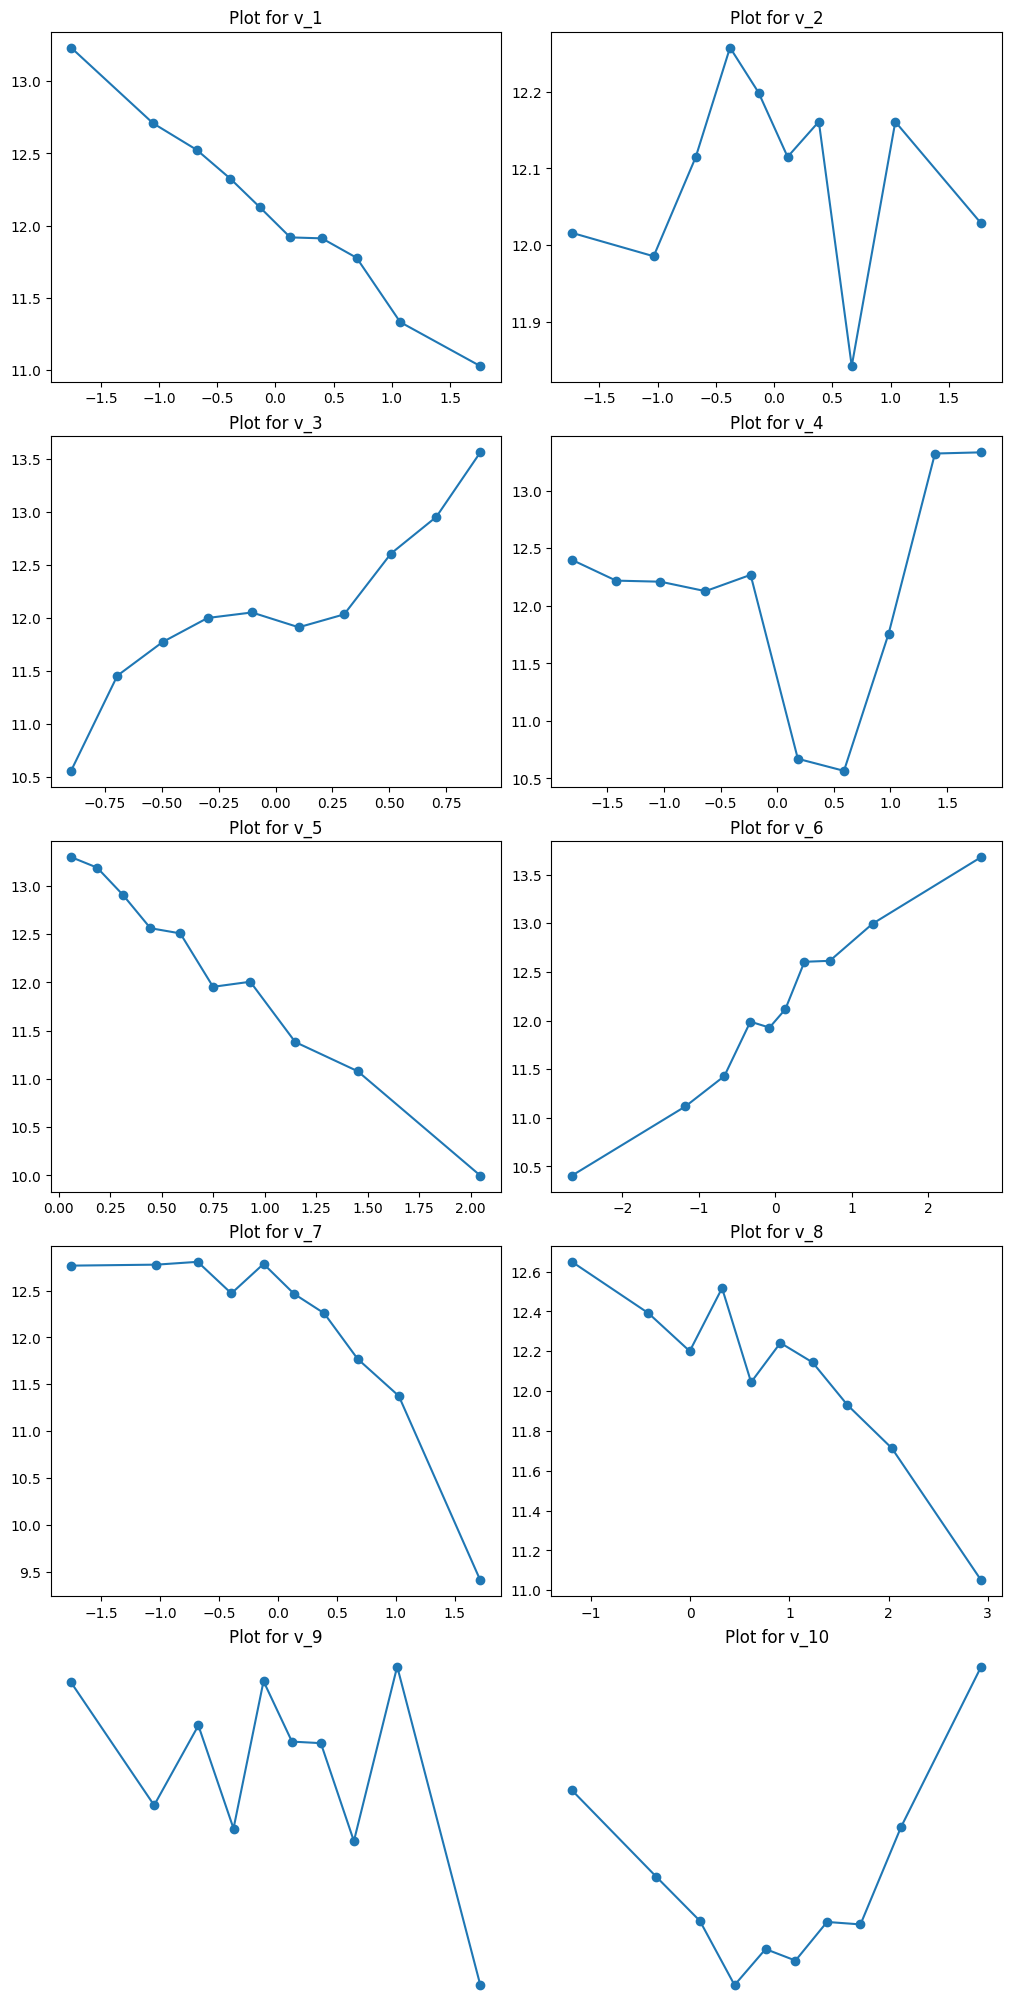

In [120]:


# 1. Determine the grid size
cols = 2  # You can adjust this
rows = math.ceil(var_count / cols)

# 2. Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), constrained_layout=True)

# 3. Flatten the axes array and loop through variables and axes
for var_name, ax in zip(var_list, axes.flatten()):
    # Prepare the data for the current variable
    data_to_plot = np.array(X_train_df[var_name])

    # Call your plotting function, passing the specific axis `ax` to it
    quantile_plot(x=data_to_plot, y=y_train, ax=ax, bins=10)

    # Set a title for each individual subplot
    ax.set_title(f'Plot for {var_name}')

# 4. Turn off any unused subplots
for i in range(num_variables, len(axes.flatten())):
    axes.flatten()[i].axis('off')

# 5. Show the final plot
plt.show()

### Code for training

In [133]:
from sklearn.linear_model import LinearRegression

In [197]:
def run_ols(X_df, y, feature_list, transformers):
    """
    Run OLS (Linear Regression) on a subset of features.

    Parameters
    ----------
    X_df : pandas.DataFrame
        DataFrame containing feature columns (e.g., ft_1, ft_2, ...).
    y : array-like
        Target vector.
    feature_list : list of str
        List of feature names to include (e.g., ["ft_1", "ft_5", "ft_6"]).

    transformers : list of optional transformations

    Returns
    -------
    model : Trained sklearn LinearRegression model
    y_pred : np.ndarray
    
    """
    # print(X_df[feature_list].columns)

    X_subset = X_df[feature_list]
    for i in range(len(feature_list)):
        if transformers[i] != None:
            X_subset.loc[:, feature_list[i]] = X_subset.loc[:, feature_list[i]].apply(transformers[i])

    model = LinearRegression(fit_intercept=True)
    model.fit(X_subset, y)
    
    return model


def pred_func(X_df, model, feature_list, transformers):
    X_subset = X_df[feature_list]
    for i in range(len(feature_list)):
        if transformers[i] != None:
            X_subset.loc[:,feature_list[i]] = X_subset.loc[:, feature_list[i]].apply(transformers[i])

    y_pred = model.predict(X_subset)
    
    return y_pred

In [198]:
def sqr_transform(x):
    return(x**2)

In [218]:
selected_vars = ['v_1', 'v_3', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10']
transform_func_list = [None, None, None, None, sqr_transform, None, None, None]
model = run_ols(X_train_df, y_train_df, selected_vars, transform_func_list)

In [219]:
model.coef_

array([[-0.5859121 ,  1.24818304, -1.7451254 ,  0.63562707, -0.44054581,
         0.12440152, -0.06517354,  0.26555215]])

### Training Evaluation

In [220]:
def mse(y_pred, y_actual):
  """
  Calculates the Mean Squared Error (MSE) between predicted and actual values.

  Args:
    y_pred (np.ndarray): A NumPy array of predicted values.
    y_actual (np.ndarray): A NumPy array of actual values.
                           Must have the same shape as y_pred.

  Returns:
    float: The mean squared error, a single numerical value.
  """
  # Ensure the inputs are NumPy arrays
  y_pred = np.array(y_pred)
  y_actual = np.array(y_actual)

  # 1. Calculate the difference (error) between actual and predicted values.
  # This is a vectorized operation, creating an array of errors.
  errors = y_actual - y_pred

  # 2. Square each error. This is also a vectorized operation.
  squared_errors = errors ** 2

  # 3. Calculate the mean of the squared errors.
  # np.mean() sums all the elements and divides by the number of elements.
  mean_squared_error = np.mean(squared_errors)

  return mean_squared_error


In [221]:
y_pred_train = pred_func(X_train_df, model, selected_vars, transform_func_list)

# Calculate MSE
error = mse(y_pred_train, y_train)

# Print the result
print(f"Mean Squared Error: {error:.4f}") 

Mean Squared Error: 16.4361


/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


### Testing Data Generation

In [236]:
y_pred_test = pred_func(X_test_df, model, selected_vars, transform_func_list)
y_pred_test = y_pred_test.reshape(test_count)

np.save("pred_isak.npy", y_pred_test)

/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Users/abhishek_shukla/sklearn-env/lib/python3.9/site-packages/sklearn/linear_model/_base.py:281: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


In [233]:
y_train.shape

(8000,)

In [237]:
y_pred_test.shape

(16000,)

In [238]:
y_pred_test

array([14.17988906, 12.18114116, 10.01481688, ...,  9.90089655,
        9.40540505, 11.18691994])

<Axes: >

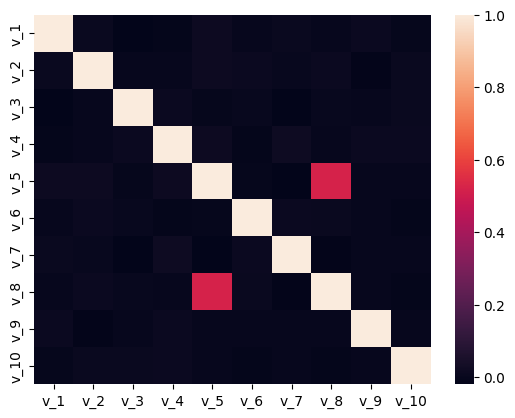

In [223]:
sns.heatmap(X_train_df.corr())